# Project: Wrangle and Analyze Data
    

## Introduction

The project focuses on *Gathering, Assessing and Cleaning* data extracted from the **We rate Dogs** twitter handle.
We need to import archived twitter data into our workspace, combine it with data downloaded from twitter through api and then analyze it to come up with insights and visualizations.

To move forward, we begin with importing necessary libraries

In [1]:
#Imporitng Required Libraries
import pandas as pd
import numpy as np
import os
import requests
import tweepy
import json
import csv
import sys
import time

*We need to begin gathering our data so as to progress further in the project.*

## Gathering Data

Now let us import the *twitter archive* file in our workbook

In [2]:
# Reading the 'twitter-archive-ehhanced.csv' file in our Jupyter Notebook
twitter_archived = pd.read_csv('twitter-archive-enhanced.csv')


Now, let us download a file by the name **'*image_predictions*'** programatically through Udacity's servers.
This file consists of tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network.

In [3]:
# Downloading/Scrapping 'image_predictions.tsv' programmatically through Udacity Server.
url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response
with open(os.path.join('image_predictions.tsv'), mode = 'wb') as file:
    file.write(response.content)

In [4]:
# Reading 'image_predictions' file in our workspace.
image_prediction = pd.read_csv('image_predictions.tsv',sep = '\t')

Using the Tweet IDs in the WeRateDogs Twitter archive data , we will now query the **Twitter API** for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called *"**tweet_json.txt**"*

*This is being done to extract each tweet's retweet count and favorite count. *

To progress we will need to first get *Consumer Keys* and *Access Keys* from Twitter Developer account. Let's begin!

In [5]:
# Initiating API set up & authentication so as to facilitate extraction of data
consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' ' 

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token = (access_token,access_secret)

api = tweepy.API(auth_handler = auth,
                wait_on_rate_limit = True,
                wait_on_rate_limit_notify = True,parser = tweepy.parsers.JSONParser())

Tweets corresponding to a few tweet IDs in the archive may have been deleted. We will use ***Try-except blocks*** to get the tweet IDs for those tweets which have been deleted.

In [6]:
# Collecting tweet status using Try-except blocks and Twitter API.
tweet_ids = list(twitter_archived['tweet_id'])

tweet_data = []
for tweet_id in tweet_ids:
    try:
        tweet_status = api.get_status(tweet_id,tweet_mode = 'extended',wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
        tweet_data.append(tweet_status)
        
    except:
        print(str(tweet_id))
        

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
845459076796616705
842892208864923648
837012587749474308
827228250799742977
Rate limit reached. Sleeping for: 731
812747805718642688
802247111496568832
775096608509886464
770743923962707968
754011816964026368
Rate limit reached. Sleeping for: 738
680055455951884288
Rate limit reached. Sleeping for: 747


*We will now write the extracted data form twitter into a JSON file.*

In [7]:
# Converting 'tweet_data' as a JSON file.
with open('tweet_json.txt','w') as file:
    json.dump(tweet_data,file)

In [8]:
# Loading the Json file in our Jupyter workspace using Pandas
twitter_json = pd.read_json('tweet_json.txt')

*This project requires us to focus only on **'retweet_count'** and **'favourite_count'**. So we would delete all the other columns from the Twitter Json file*.

In [9]:
# Deleting Irrelevant columns
twitter_json = twitter_json[['id','favorite_count','retweet_count']]

Let's move onto the next step

## Assess

*Data Gathering has been completed in the above steps and now it's time for assessing the data.*

The purpose of assessing data in this project is to find out **at least 8 quality issues** and **2 tidiness issues.**

We begin with assessing the data visually.

In [10]:
# Assessing Twitter Archive data Visually
twitter_archived

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
# Assessing Image Prediction data Visually
image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [12]:
# Assessing Twitter Archive data Visually
twitter_json

,id,favorite_count,retweet_count
0,892420643555336193,37664,8213
1,892177421306343426,32354,6072
2,891815181378084864,24369,4015
3,891689557279858688,40981,8361
4,891327558926688256,39182,9070
5,891087950875897856,19701,3007
6,890971913173991426,11518,1988
7,890729181411237888,63525,18242
8,890609185150312448,27089,4131
9,890240255349198849,31045,7129


Now,  let's assess all three datasets programatically.

In [13]:
# Assessing Twitter Archive file programatically
twitter_archived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

*We can see a few quality issues from the above table as well*. For example, data type for **'tweet_id'** is **int64** whereas ideally it should be a **string**.

The best way to observe more issues with the dataset is by seeing what are the values in each column using the function *'value_counts'*. Let's start!

In [14]:
# Values and their respective count in 'Tweet ID' Column.
twitter_archived['tweet_id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [15]:
# Values and their respective count in 'Text' Column.
twitter_archived['text'].value_counts()

This is Brudge. He's a Doberdog. Going to be h*ckin massive one day. 11/10 would pat on head approvingly https://t.co/cTlHjEUNK8                                          1
This is Bungalo. She uses that face to get what she wants. It works unbelievably well. 12/10 would never say no to https://t.co/0Fcft7jl4N                                1
This is Carper. He's a Tortellini Angiosperm. In desperate need of a petting. 11/10 would hug softly https://t.co/lK9YDkRzPj                                              1
This is Lucy. She knits. Specializes in toboggans. 10/10 I'd buy a toboggan from Lucy https://t.co/YE2XDHy4Yk                                                             1
This is Harrison. He braves the snow like a champ. Perched at all times. Hasn't blinked in months. 8/10 v nifty dog https://t.co/tiVuq6MNwl                               1
This is Luther. He saw a ghost. Spooked af. 11/10 hang in there pupper https://t.co/EdKG43VvEl                                              

In [16]:
# Values and their respective count in 'Retweeted Status ID' Column.
twitter_archived['retweeted_status_id'].value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [17]:
# Values and their respective count in 'Retweeted Status User ID' Column.
twitter_archived['retweeted_status_user_id'].value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [18]:
# Values and their respective count in 'Retweeted Status Timestamp' Column.
twitter_archived['retweeted_status_timestamp'].value_counts()

2016-12-07 22:38:52 +0000    1
2016-08-15 16:22:20 +0000    1
2016-07-25 15:23:28 +0000    1
2016-06-08 22:48:46 +0000    1
2017-06-08 03:32:35 +0000    1
2016-05-16 00:31:53 +0000    1
2016-08-08 17:19:51 +0000    1
2017-02-17 03:39:51 +0000    1
2016-09-27 02:53:48 +0000    1
2016-07-13 01:34:21 +0000    1
2016-08-22 16:06:54 +0000    1
2016-01-25 00:26:41 +0000    1
2015-12-29 04:31:49 +0000    1
2017-01-02 17:00:46 +0000    1
2016-07-06 15:54:42 +0000    1
2015-11-20 03:43:06 +0000    1
2017-02-12 01:04:29 +0000    1
2016-07-22 00:43:32 +0000    1
2016-10-13 23:23:56 +0000    1
2016-05-28 03:04:00 +0000    1
2017-03-01 18:47:10 +0000    1
2015-11-20 03:41:59 +0000    1
2016-08-05 21:19:27 +0000    1
2017-02-18 01:39:12 +0000    1
2016-10-23 00:27:05 +0000    1
2017-01-11 02:15:36 +0000    1
2016-01-08 05:00:14 +0000    1
2016-11-09 00:37:46 +0000    1
2016-11-02 23:45:19 +0000    1
2016-09-19 01:42:24 +0000    1
                            ..
2017-05-27 19:39:34 +0000    1
2017-01-

In [19]:
# Values and their respective count in 'Rating Numerator' Column.
twitter_archived['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [20]:
# Values and their respective count in 'Rating Denominator' Column.
twitter_archived['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [21]:
# Values and their respective count in 'Name' Column.
twitter_archived['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Penny        10
Tucker       10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
an            7
Daisy         7
Buddy         7
Bailey        7
Toby          7
Bella         6
Koda          6
Oscar         6
Rusty         6
Milo          6
Jax           6
Scout         6
Stanley       6
Dave          6
Leo           6
Jack          6
Larry         5
           ... 
Tuck          1
Darrel        1
Banditt       1
Boston        1
Blakely       1
Rooney        1
Socks         1
Mo            1
Rupert        1
Zoe           1
Obi           1
Arya          1
Trigger       1
Rover         1
Fillup        1
Amy           1
Deacon        1
Jersey        1
Brutus        1
Tassy         1
Gerbald       1
Donny         1
Clybe         1
Emmie         1
Andy          1
Humphrey      1
Orion         1
Kobe          1
Shiloh        1
Zeek          1
Name: name, Length: 957,

In [22]:
# Assessing Image Prediction file programatically
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Now, we will apply *'value_counts'* function on all columns of *'image_prediction'* file

In [23]:
# Values and their respective count in 'JPG URL' Column.
image_prediction['jpg_url'].value_counts()

https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg                                            2
https://pbs.twimg.com/media/CtVAvX-WIAAcGTf.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/675354114423808004/pu/img/qL1R_nGLqa6lmkOx.jpg    2
https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg                                            2
https://pbs.twimg.com/media/CzG425nWgAAnP7P.jpg                                            2
https://pbs.twimg.com/media/C2oRbOuWEAAbVSl.jpg                                            2
https://pbs.twimg.com/media/CtKHLuCWYAA2TTs.jpg                                            2
https://pbs.twimg.com/media/CmoPdmHW8AAi8BI.jpg                                            2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg                                            2
https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZ

In [24]:
# Values and their respective count in 'Img Num' Column.
image_prediction['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [25]:
# Values and their respective count in 'P1' Column.
image_prediction['p1'].value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
teddy                         18
Maltese_dog                   18
Shetland_sheepdog             18
beagle                        18
Eskimo_dog                    18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [26]:
# Values and their respective count in 'P1 Conf' Column.
image_prediction['p1_conf'].value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
0.420463    2
0.581403    2
0.403698    2
0.530104    2
0.254856    2
0.346545    2
0.721188    2
0.677408    2
0.907083    2
0.243529    2
0.505370    2
0.593858    2
0.372202    2
0.274637    2
0.600276    2
0.506312    2
0.615163    2
0.556595    2
0.995143    2
0.809197    2
0.964929    2
0.777468    2
0.336200    2
0.617389    2
0.786089    2
           ..
0.483228    1
0.556524    1
0.176423    1
0.318981    1
0.733025    1
0.730152    1
0.436023    1
0.479008    1
0.162935    1
0.897162    1
0.320420    1
0.999833    1
0.995873    1
0.523206    1
0.942911    1
0.537652    1
0.672791    1
0.952258    1
0.855959    1
0.665578    1
0.841265    1
0.668164    1
0.946828    1
0.714719    1
0.352946    1
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [27]:
# Values and their respective count in 'P1 Dog' Column.
image_prediction['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [28]:
# Values and their respective count in 'P2' Column.
image_prediction['p2'].value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
miniature_poodle                   33
Siberian_husky                     33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
Pekinese                           21
American_Staffordshire_terrier     21
miniature_pinscher                 20
chow                               20
malinois                           20
Samoyed                            20
toy_terrier                        20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [29]:
# Values and their respective count in 'P2 Conf' Column.
image_prediction['p2_conf'].value_counts()

0.069362    3
0.027907    2
0.193654    2
0.271929    2
0.003143    2
0.197021    2
0.347609    2
0.151047    2
0.052724    2
0.153126    2
0.119256    2
0.227150    2
0.057091    2
0.149950    2
0.025119    2
0.165930    2
0.190503    2
0.012763    2
0.181351    2
0.325106    2
0.020089    2
0.172844    2
0.142204    2
0.152445    2
0.052956    2
0.099984    2
0.093940    2
0.252706    2
0.140798    2
0.130611    2
           ..
0.083513    1
0.100988    1
0.038062    1
0.317368    1
0.256433    1
0.057883    1
0.098354    1
0.250014    1
0.088474    1
0.178088    1
0.053008    1
0.052396    1
0.165655    1
0.182538    1
0.074962    1
0.120530    1
0.169758    1
0.119745    1
0.090938    1
0.071665    1
0.139346    1
0.036575    1
0.073101    1
0.118181    1
0.000077    1
0.138331    1
0.254884    1
0.090644    1
0.219323    1
0.016301    1
Name: p2_conf, Length: 2004, dtype: int64

In [30]:
# Values and their respective count in 'P2 Dog' Column.
image_prediction['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [31]:
# Values and their respective count in 'P3' Column.
image_prediction['p3'].value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
Staffordshire_bullterrier         32
chow                              32
cocker_spaniel                    31
beagle                            31
toy_poodle                        29
Pomeranian                        29
Pekinese                          29
Pembroke                          27
Great_Pyrenees                    27
Chesapeake_Bay_retriever          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
Cardigan                          23
pug                               23
basenji                           21
toy_terrier                       20
bull_mastiff                      20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
b

In [32]:
# Values and their respective count in 'P3 Conf' Column.
image_prediction['p3_conf'].value_counts()

0.094759    2
0.035711    2
0.000428    2
0.044660    2
0.162084    2
0.077130    2
0.116806    2
0.146427    2
0.003956    2
0.039012    2
0.137186    2
0.109677    2
0.096435    2
0.157028    2
0.157524    2
0.118199    2
0.016497    2
0.100842    2
0.151024    2
0.005410    2
0.026364    2
0.186789    2
0.223263    2
0.087355    2
0.121523    2
0.041476    2
0.071436    2
0.046403    2
0.014858    2
0.003330    2
           ..
0.098207    1
0.013206    1
0.106014    1
0.044002    1
0.127037    1
0.001404    1
0.001274    1
0.008451    1
0.039808    1
0.056548    1
0.001310    1
0.016663    1
0.079883    1
0.122701    1
0.047397    1
0.068297    1
0.031673    1
0.047601    1
0.019516    1
0.051835    1
0.078720    1
0.143328    1
0.000436    1
0.003383    1
0.109454    1
0.024007    1
0.132820    1
0.002099    1
0.083643    1
0.033835    1
Name: p3_conf, Length: 2006, dtype: int64

In [33]:
# Values and their respective count in 'P3 Dog' Column.
image_prediction['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [34]:
# Assessing Twitter Json file programatically
twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 3 columns):
id                2339 non-null int64
favorite_count    2339 non-null int64
retweet_count     2339 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [35]:
# Values and their respective count in 'ID' Column.
twitter_json['id'].value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
833722901757046785    1
805487436403003392    1
759923798737051648    1
674742531037511680    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
818259473185828864    1
842765311967449089    1
809920764300447744    1
                     ..
870308999962521604    1
720775346191278080    1
879492040517615616    1
775733305207554048    1
667911425562669056    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
690938899477221376    1
6788002836490690

In [36]:
# Checking for duplicated IDs
twitter_json['id'].value_counts().max()

1

In [37]:
# Values and their respective count in 'Favorite Count' Column.
twitter_json['favorite_count'].value_counts()

0        167
430        3
3520       3
3340       3
329        3
959        3
721        3
347        3
2250       3
1538       3
2456       3
1192       3
740        3
3588       3
302        3
330        2
142        2
2510       2
2520       2
12763      2
2534       2
505        2
2568       2
531        2
441        2
579        2
1282       2
2734       2
2738       2
2748       2
        ... 
1526       1
10652      1
8603       1
10650      1
8571       1
3125       1
357        1
6506       1
6345       1
8895       1
4463       1
6512       1
369        1
8563       1
4471       1
2426       1
14716      1
13681      1
5011       1
383        1
2434       1
10628      1
389        1
397        1
3415       1
401        1
14738      1
2452       1
2454       1
4094       1
Name: favorite_count, Length: 1998, dtype: int64

In [38]:
# Values and their respective count in 'Retweet Column' Column.
twitter_json['retweet_count'].value_counts()

830      5
57       5
245      5
524      5
590      5
644      5
217      4
486      4
698      4
689      4
567      4
231      4
477      4
1771     4
65       4
1238     4
573      4
88       4
496      4
636      4
804      4
769      4
3663     4
127      4
401      4
8217     3
721      3
222      3
78       3
239      3
        ..
395      1
397      1
2448     1
4497     1
2450     1
403      1
411      1
2410     1
211      1
2318     1
303      1
271      1
2324     1
704      1
4099     1
2334     1
287      1
6440     1
299      1
2352     1
347      1
311      1
313      1
321      1
323      1
16709    1
327      1
5115     1
4435     1
1988     1
Name: retweet_count, Length: 1705, dtype: int64

*Now, we can see that there are multiple issues in all the three datasets. Let's list them down!*

### Quality Issues

#### Twitter Archived File

**1.** *Data type of 'tweet_id' has been read as int64*

**2.** *Data type of 'timestamp' has been stored as string*

**3.** *Data contains many retweets*

**4.** *Name column contains wierd values such as 'a', 'such','the','None' etc.*

**5.** *Denominator has values such as 170, 150, 130 etc.*

**6.** *Numerator has a few extremely large values such as 420, 1776 etc.*


**7.** *Quite a few unnecessary columns.*




#### Image Predictions File

**1.** *Data type of *tweet_id* has been stored as integer*

**2.** *Names in 'P1', 'P2' & 'P3' are not consistent. First alphabet is in upper case for some entries and lower case for others.*

**3.** *The column 'jpg_url' has duplicate values.*

**4.** *There are missing values in the dataset.*

#### Twitter JSON File


**1.** *ID column is not named correctly.*

**2.** *There are a few retweets*

### Tidiness Issues

**1.** *Twitter Archive and Twitter JSON file are two separate files even though they contain information about the same tweets.*


**2.** *Dog Stage has been represented in 4 different columns (Doggo,Floofer,Pupper,Puppo).*


We have identified both **Quality** and **Tidiness** issues in our datasets.

Now, let's move onto Cleaning the datasets

## Cleaning Data

It is very important to make copies of our datasets before cleaning. Let's do that first!

In [39]:
#Making copies of our dataset
twitter_archived_v1 = twitter_archived.copy()
image_prediction_v1 = image_prediction.copy()
twitter_json_v1 = twitter_json.copy()


Now, we will address tidiness and quality issues & clean our datasets.

#### Addressing Quality Issues

**##** *Data contains many retweets*

**Define**

Delete tweets have been retweeted. 

**Code**

In [40]:
# Delete tweets that have a 'null' in "retweeted_status_user_id"
twitter_archived_v1 = twitter_archived_v1[pd.isnull(twitter_archived_v1['retweeted_status_user_id'])]

**Test**

In [41]:
# Testing whether retweets have been deleted.
sum(twitter_archived_v1.retweeted_status_user_id.value_counts())

0

**##** *Data type of 'tweet_id' has been read as int64*

**Define**

Convert *'tweet_id'* to a string object

**Code**

In [42]:
# Converting 'tweet_id' into a string for twitter archived data
twitter_archived_v1['tweet_id'] = twitter_archived_v1['tweet_id'].astype(str)

In [43]:
# Converting 'tweet_id' into a string for image predictins data
image_prediction_v1['tweet_id'] = image_prediction_v1['tweet_id'].astype(str)

**Test**

In [44]:
# Checking the data type of tweet ID
twitter_archived_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(2), object(

In [45]:
# Checking the data type of tweet ID
image_prediction_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**##** *Data type of 'timestamp' has been stored as string*

**Define**

Convert *'timestamp'* into a datatime.

**Code**

In [46]:
# Changing datatype of timestamp to datetime
twitter_archived_v1['timestamp'] = pd.to_datetime(twitter_archived_v1['timestamp'])

**Test**

In [47]:
# Checking the data type of timestamp
twitter_archived_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null datetime64[ns]
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: datetime64[ns](1), fl

**##** *Name column contains wierd values such as 'a', 'such','the','None' etc.*

**Define**

All such weird values start with a *lower case* alphabet, whereas all other names start with an *upper case* alphabet. Delete/replace all names that start with a lower case with 'NaN'  to solve this issue.

**Code**

In [48]:
# Creating a list and appending all names that start with a lower case alphabet to it.
weird_names = []
for i in twitter_archived_v1['name']:
    if i[0].islower() :
        weird_names.append(i)
print(np.unique(weird_names))

['a' 'actually' 'all' 'an' 'by' 'getting' 'his' 'incredibly' 'infuriating'
 'just' 'life' 'light' 'mad' 'my' 'not' 'officially' 'old' 'one' 'quite'
 'space' 'such' 'the' 'this' 'unacceptable' 'very']


In [49]:
# Replacing weird names with NaN
twitter_archived_v1['name'] = twitter_archived_v1['name'].replace(weird_names,np.nan)

In [50]:
# Replacing 'None' with NaN
twitter_archived_v1['name'].replace('None',np.nan,inplace = True)

**Test**

In [51]:
twitter_archived_v1['name'].value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
Tucker         9
Sadie          8
Winston        8
Lola           8
Toby           7
Daisy          7
Stanley        6
Oscar          6
Jax            6
Bella          6
Koda           6
Bo             6
Bailey         6
Bentley        5
Dave           5
Scout          5
Louis          5
Milo           5
Chester        5
Buddy          5
Leo            5
Rusty          5
Alfie          4
Jack           4
Gus            4
              ..
Toffee         1
Amber          1
Hermione       1
Paull          1
Mac            1
Frönq          1
Mya            1
Nida           1
Jay            1
Kenny          1
Hurley         1
Lance          1
Brady          1
Flurpson       1
Eazy           1
Newt           1
Hero           1
Jameson        1
Hector         1
Harlso         1
Sailor         1
Diogi          1
Staniel        1
Grady          1
Rontu          1
Chesterson     1
Willie         1
Betty         

**##** *Numerator has a few extremely large values such as 420, 1776 etc.* **&** *Denominator has values such as 170, 150, 130 etc.*

**Define**

Why numerator and denominator have such inflated values is something we cannot judge. Maybe dog owners wanted to express their unconditional love for their dogs by assigning more than 100% rating. To understand ratings better, it is best to calculate a new column named **'rating'**, which would be evaluated by *dividing 'rating_numerator' by 'rating_denominator'*

**Code**

In [52]:
# Calculating Rating
twitter_archived_v1['rating'] = twitter_archived_v1.rating_numerator.astype(float)/twitter_archived_v1.rating_denominator.astype(float)

**Test**

In [53]:
# Checking the newly created Rating Column
twitter_archived_v1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,1.2


**##** *The column 'jpg_url' has duplicate values.*

**Define**

Drop rows that have duplicate *'jpg_url'*

**Code**

In [54]:
# Highlighting number of rows that have duplicate values
sum(image_prediction_v1.duplicated('jpg_url'))

66

In [55]:
# Dropping duplicate rows
image_prediction_v1['jpg_url'].drop_duplicates(inplace=True)


**Test**

In [56]:
# Checking whether duplicate values have been removed
sum(image_prediction_v1.jpg_url.duplicated())

0

In [57]:
# Checking whther Null values have been removed
sum(pd.isnull(image_prediction_v1.jpg_url))

0

**##** *Too many Columns for Image Prediction and Confidence Level*

**Define**

Create two columns. One for *'Image Predictions'* and the other for *'Confidence Level'*

**Code**

In [58]:
# Creating two lists for Image prediction and confidence level respectively.
prediction = []
confidence_level = []

# Creating a function to extract all predictions & confidence levels in two separate lists
def predict(image_prediction_v1):
    if image_prediction_v1['p1_dog'] == True:
        prediction.append(image_prediction_v1['p1'])
        confidence_level.append(image_prediction_v1['p1_conf'])
    elif image_prediction_v1['p2_dog'] == True:
        prediction.append(image_prediction_v1['p2'])
        confidence_level.append(image_prediction_v1['p2_conf'])
    elif image_prediction_v1['p3_dog'] == True:
        prediction.append(image_prediction_v1['p3'])
        confidence_level.append(image_prediction_v1['p3_conf'])
    else:
        prediction.append('NaN')
        confidence_level.append('NaN')

# Applying the above created 'predict' function to our Image Prediction dataset       
image_prediction_v1.apply(predict, axis=1)

# Creating new columns for 'Prediction' & 'Confidence Level'
image_prediction_v1['prediction'] = prediction
image_prediction_v1['confidence_level'] = confidence_level

In [59]:
# Delete Rows that have a NaN
image_prediction_v1 = image_prediction_v1[image_prediction_v1['prediction'] != 'NaN']

**Test**

In [60]:
# Checking whether two new columns have been created
image_prediction_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id            1751 non-null object
jpg_url             1751 non-null object
img_num             1751 non-null int64
p1                  1751 non-null object
p1_conf             1751 non-null float64
p1_dog              1751 non-null bool
p2                  1751 non-null object
p2_conf             1751 non-null float64
p2_dog              1751 non-null bool
p3                  1751 non-null object
p3_conf             1751 non-null float64
p3_dog              1751 non-null bool
prediction          1751 non-null object
confidence_level    1751 non-null object
dtypes: bool(3), float64(3), int64(1), object(7)
memory usage: 169.3+ KB


In [61]:
# Checking the first few rows of Image Prediction dataset
image_prediction_v1.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,prediction,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,miniature_pinscher,0.560311


**##** *A lot of unnecessary columns*

**Define**

Delete Columns that won't be used for analysis

In [62]:
# Deleting columns that are no longer required from Image Prediction Dataset
image_prediction_v1 = image_prediction_v1.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)


In [63]:
# Deleting unnecessary columns from the Twitter Archived file
twitter_archived_v1 = twitter_archived_v1.drop(['retweeted_status_timestamp', 'retweeted_status_user_id', 
                                                      'expanded_urls', 'retweeted_status_id', 
                                                      'in_reply_to_status_id', 'in_reply_to_user_id'], 1)


**Test**

In [64]:
# Checking whether columns have been deleted
image_prediction_v1.head()

,tweet_id,jpg_url,prediction,confidence_level
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311


In [65]:
# Checking whether columns have been deleted
twitter_archived_v1.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,1.3
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,1.3
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,1.2
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,1.3
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,1.2


#### Addressing Tidiness Issues

**##** *Twitter Archive and Twitter JSON file are two separate files even though they contain information about the same tweets.*

**Define**

Merge the datasets together using pandas merge function

First, *'id'* column in Twitter JSON file will be renamed to *'tweet_id'* Then, change the datatype of *tweet_id* to object

**Code**

In [66]:
# Renaming id to tweet_id
twitter_json_v1.rename(columns={'id':'tweet_id'},inplace = True)

In [67]:
# Changing datatype of tweet_id
twitter_json_v1['tweet_id'] = twitter_json_v1['tweet_id'].astype(str)

In [68]:
# Merging the two datasets using Pandas
twitter_archived_final = pd.merge(twitter_archived_v1,twitter_json_v1,how = 'left',on = ['tweet_id'])

**Test**

In [69]:
# Checking the first 5 rows of the dataset to ensure that the columns have been merged.
twitter_archived_final.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,rating,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None,1.3,37664.0,8213.0
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None,1.3,32354.0,6072.0
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None,1.2,24369.0,4015.0
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None,1.3,40981.0,8361.0
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None,1.2,39182.0,9070.0


**##** *Dog Stage has been represented in 4 different columns (Doggo,Floofer,Pupper,Puppo).*

**Define**

Extract different dog stages from 'text' column using string extract method. Then, drop the 4 columns that represent dog stages (Doggo,Floofer,Pupper,Puppo).

In [70]:
# Extracting Dog Stages
twitter_archived_final['dog_stage'] = twitter_archived_final['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [71]:
# Dropping Dog Stage Columns
twitter_archived_final = twitter_archived_final.drop(['doggo','floofer','pupper','puppo'],axis = 1)

**Test**

In [72]:
# Checking whether Dog Stage columns have been dropped
twitter_archived_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 11 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
rating                2175 non-null float64
favorite_count        2172 non-null float64
retweet_count         2172 non-null float64
dog_stage             364 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(5)
memory usage: 203.9+ KB


In [73]:
# Checking the first 5 rows
twitter_archived.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**##** *We will now Merge the Twitter Archived Final file with the Image Predictions file using Tweet ID*

**Code**

In [74]:
# Merging the twitter archived final file with image predictions
twitter_archived_master = pd.merge(twitter_archived_final,image_prediction_v1,how = 'left',on = ['tweet_id'])

**Test**

In [75]:
# Checking whether all files have been merged together
twitter_archived_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
rating                2175 non-null float64
favorite_count        2172 non-null float64
retweet_count         2172 non-null float64
dog_stage             364 non-null object
jpg_url               1686 non-null object
prediction            1686 non-null object
confidence_level      1686 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 254.9+ KB


## Storing Data

In [76]:
# Storing the master file in CSV format
twitter_archived_master.to_csv('twitter_archived_master.csv',index = False)

## Analyzing Data

Now, we will analyze the dataset to understand our data better and draw conclussions

In [77]:
# Checking the columns and their respective data types
twitter_archived_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
source                2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  1391 non-null object
rating                2175 non-null float64
favorite_count        2172 non-null float64
retweet_count         2172 non-null float64
dog_stage             364 non-null object
jpg_url               1686 non-null object
prediction            1686 non-null object
confidence_level      1686 non-null object
dtypes: datetime64[ns](1), float64(3), int64(2), object(8)
memory usage: 254.9+ KB


In [78]:
# Storing the master file in a new dataframe 'df'
df = twitter_archived_master

Now let's dig a bit deep to come up with interesting insights

**The most frequently used Twitter Source**

In [79]:
# Figuring out the most frequently used Data Source
df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2042
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       31
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [80]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'rating', 'favorite_count',
       'retweet_count', 'dog_stage', 'jpg_url', 'prediction',
       'confidence_level'],
      dtype='object')

We can easily see that **Twitter for iPhone** is the source with the largest usage/frequencey

**The most highly rated Dog Breeds**

In [81]:
# Figuring out the most highly rated breeds
high_rating = df.groupby('prediction')['rating'].sum()
high_rating.sort_values(ascending = False)

prediction
golden_retriever              184.346753
Labrador_retriever            120.900000
Pembroke                      108.400000
Chihuahua                      95.636364
pug                            63.500000
toy_poodle                     56.300000
chow                           54.800000
Pomeranian                     52.400000
Samoyed                        49.100000
malamute                       35.900000
French_bulldog                 34.700000
cocker_spaniel                 34.000000
Chesapeake_Bay_retriever       33.600000
Eskimo_dog                     25.100000
miniature_pinscher             25.000000
Cardigan                       23.400000
German_shepherd                23.100000
Staffordshire_bullterrier      22.600000
Siberian_husky                 22.500000
Rottweiler                     21.100000
kuvasz                         20.900000
Shih-Tzu                       20.700000
beagle                         20.300000
Shetland_sheepdog              20.000000
Lakel

Above we can see all Dog Breeds and their respective rating.

**Golden Retriever** is the highest rated breed followed by **Labrador Retriever**.

The lowest rated dog breed is **Japanese Spaniel.**

**Mean Retweet Count**

In [82]:
# Calculating the mean Retweet Count
df.retweet_count.mean()

2609.3314917127072

On an average, *2611* tweets were retweeted

**Mean Favorite Count**

In [83]:
# Calculating the mean Favorite Count
df.favorite_count.mean()

8482.6892265193364

On an average, *8488* tweets were liked

## Visualizations

Let's plot a few visualizations for better understanding of the project

**Retweets Vs Likes**

Text(0.5,1,'Retweets and Likes Scatter plot')

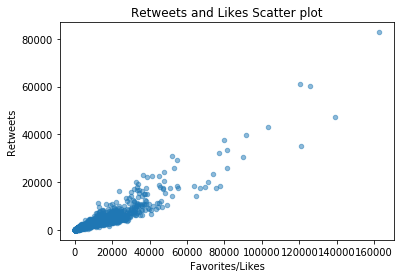

In [84]:
# Plotting a Scatter plot between Retweets and Favorite count
import matplotlib.pyplot as plt
% matplotlib inline
df.plot(kind='scatter',x='favorite_count',y='retweet_count', alpha = 0.5)
plt.xlabel('Favorites/Likes')
plt.ylabel('Retweets')
plt.title('Retweets and Likes Scatter plot')

We can see that there is a positive relationship between *Retweets* and *Likes*. If a tweet gathers more likes, there is a high chance that will get many retweets and vice-versa. This makes sense logically as well. If a person likes a tweet, he would like to share it with other via *retweeting*

*We can also calculate their correlation to further strengthen our analysis.*

In [85]:
# Calculating Correlation between Likes and Retweets
df[['favorite_count','retweet_count']].corr()

,favorite_count,retweet_count
favorite_count,1.000000,0.927621
retweet_count,0.927621,1.000000


The correlation between 'Likes' & 'Retweets' is **92.75%**. Therefore, the relationship between them is extremely strong & positive.

**Most Commonly Used Dog Names** 

Text(0,0.5,'Number of Dogs')

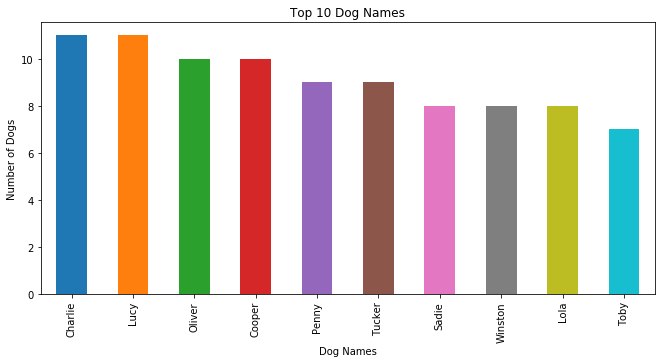

In [90]:
plot = df.name.value_counts()[0:10].plot('bar', figsize=(11,5), title='Top 10 Dog Names').set_xlabel("Dog Names")
plt.ylabel("Number of Dogs")

*In the above plot, we can see the 10 most common dog names*

**Charlie** is the most common dog name.
**Toby** is the 10th most popular dog name